In [32]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import sklearn
from sklearn import datasets

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

dir = r"./"
name = "diabetes.csv"

f = os.path.join(dir, name)
df = pd.read_csv(f)
print(df.head())

col_names = df.columns.tolist()
df_omit = df[["Pregnancies", "Outcome"]]

weights = np.array([0,0,0])

def feature_meas_tuples(data_df):
    tups = list(data_df.to_records(index=False))
    return tups

def sigmoid(z):
    return 1/(1+np.exp(-z))
    

def grad_descent(learning_rate, feature_weights, data):
    '''computes gradient descent'''
    w = feature_weights
    for pt in data:
        
        x1 = np.array([1,])
        x2 = np.asarray(list(pt)[:-1],)
        
        x = np.concatenate((x2,x1), axis=None)
        z = np.dot(x, w)
        y_est = sigmoid(z)       
        
        y = pt[-1]
        cross_entropy = np.dot((y_est-y), x.T)/len(data)
        w = w - learning_rate*cross_entropy
        
    
    
    return w
    

arr = feature_meas_tuples(df_omit)
ep_limit = 0.001

iter = 100
weights = [0, 0]
for i in range(iter):
    w = grad_descent(0.1, weights, arr)
    weights = w
    
print(w)



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
[ 0.06775227 -0.72059699]


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


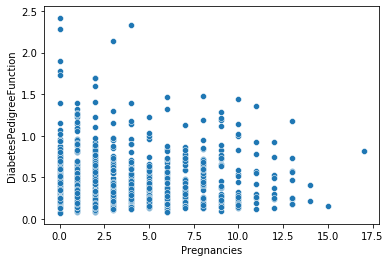

In [16]:
print(col_names)
sb.scatterplot(data=df, x="Pregnancies", y="DiabetesPedigreeFunction")

In [25]:

n1 = 0
n2 = 17.5
N = n2-n1+1
x = np.linspace(n1,n2,N)

y_est = sigmoid(np.dot)


TypeError: bad operand type for unary -: 'function'

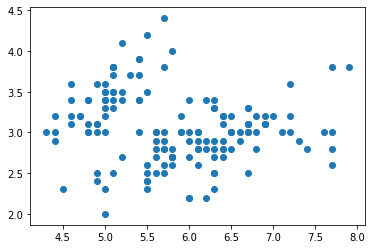

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [78]:

def fit(x,y, rate,iters):
    '''this one is better'''
    X = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
    theta = np.zeros(X.shape[1])
    for i in range(iters):
        z = np.dot(X, theta)

        y_est = sigmoid(z)

        cross_entropy = np.dot(X.T, (y_est-y))/y.shape
        theta = theta - rate*cross_entropy
    return theta

def probability(x, weights):
    X = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
    return sigmoid(np.dot(X, weights))

def predict(X, weights, thresh):
    return probability(X, weights)>=thresh
    
    
theta = fit(X, y,0.1,300000)
result = predict(X, theta, 0.5)
print(result)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True 